

# Project: Investigating FBI Gun Permit Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The report analyzes the firearm background check data by FBI's National Instant Criminal Background Check System (NICS). NICS determines if a buyer is eligible for purchasing a firearm or explosive by checking any previous criminal record. The statistics in this dataset do not represent the number of firearm sold, rather, they indicate the number of firearm background checks initiated by NICS [1]. The gun permit data has been supplemented with state level data from census.gov. In the first place, this report aims to identify the overall trend of gun registrations over the years. It will also find out the states with higher gun registration numbers. Secondly, the report will determine which census data is most associated to the high gun permits in the states. 

Two datasets are investigated in this research—the NICS data and the U.S. census data. The NICS data contains data of all transactions submitted to NICS by month, state, and type [1]. Each transaction type is broken down to the type of firearms—handgun, long gun, and other. This research will only consider the total number of transactions or permits submitted to NICS. The U.S. census data contains several variables at the state level, such as, population estimates, percentages of population based on race, total employment, and many more. Most variables just have one data point per state (either 2016 or 2015).

Over the course of the report, the questions will be explored by analyzing one dependent variable (total gun permits) and three independent variables (states, population estimates in 2016, and total employment in 2015). The report contains three major sections—data wrangling (data cleaning and preparation), exploratory data analysis (investigating the questions), and conclusions (tentative findings).

To perform the data analysis, first, all the necessary packages are imported. This project uses the Python libraries—NumPy, pandas, and Matplotlib. These packages make writing data analysis code in Python a lot easier, and  Matplotlib produces visualizations to plot the findings.


In [151]:
# Importing all the packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, two datasets are loaded: gun-data.xlsx and u.s.-census-data.csv. The datasets are then checked for cleanliness, trimmed and cleaned for analysis. Each steps are documented and each cleaning decisions are justified. 

### General Properties
This sub-section of data wrangling examines the datasets to know their structures, presence of null values, and datatypes. Based on the observations, data cleaning is performed in the next part of data wrangling, to prepare the datasets for the exploratory analysis.

In [152]:
# Loading two datasets 
df_gun = pd.read_excel (r"C:\Users\tonim\gun-data.xlsx")
df_census = pd.read_csv('u.s.-census-data.csv')

The datasets are loaded as two dataframes—df_gun and df_census, respectively. 

In [153]:
# Displaying the first five rows of the df_gun dataframe to understand its structure
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


The df_gun dataframe contains the total number of permits processed each month in each states. The totals column presents the sum of different permit types for that particular entry. Statistics are dated from 1998 to 2017.

In [154]:
# Checking the number of rows and columns of df_gun
df_gun.shape

(12485, 27)

The df_gun dataframe a large dataset with 12485 rows and 27 columns. 

In [155]:
# Inspecting df_gun for null values and data types 
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In the df_gun dataframe, data is provided as strings, floats, and integers. Many of the columns contain null values. This study only focuses on the totals column. Therefore, other permit columns will be dropped in the data cleaning section. 

In [156]:
# Displaying the first five rows of the df_census dataframe to understand its structure
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The df_census data provides some facts for all 50 states, such as, populations estimates, age groups, percentage of female population, race, housing, education, employment, and so forth. Facts are presented in rows and statistics for each of the states are displayed in columns. 

In [157]:
# Checking the total number of rows and columns of df_census
df_census.shape

(85, 52)

The df_census dataframe has 85 rows and 52 columns.

In [158]:
# Inspecting df_census for null values and data types 
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In df_census, data is provided as strings. Most of the columns contain null values, which will be cleaned in the data cleaning section.

### Data Cleaning

This study primarily evaluates the number of total permits initiated by NICS each month. Therefore, only three columns are relevant in the df_gun dataframe—month, state, and totals. Other columns are dropped to make the dataset much shorter and easier to deal with.

In [159]:
# Dropping other columns except 'month', state', and 'totals'
drop_list = ["state", "totals", "month"]
df_gun.drop(df_gun.columns.difference(drop_list), axis=1, inplace=True)
# Checking dataframe after running the code 
df_gun.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


The column name is changed from totals to total_permit in the df_gun dataframe, for the ease of discussion.

In [160]:
# Renaming the column
df_gun.rename(columns={"totals":"total_permit"}, inplace=True)
# Checking if the column name has been changed 
df_gun.head()

,month,state,total_permit
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


Now, cleanup and trimming are performed on the df_census dataframe.

In [161]:
# Checking for null values in the bottom rows of df_census
df_census.tail(25)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that there are null values in row 84 through 63. Therefore, these rows will be dropped as they are not relevant to this research.

In [162]:
# Dropping entries with null values, the bottom 21 rows 
df_census.drop(df_census.index[64:85], 0, inplace=True)
# Checking the dataframe after dropping is performed
df_census.tail(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


The Fact Note column appears as null through out the dataset. It actually contains specific notes related to the Fact column. The research topics posed in this report do not have any fact note provided. Therefore, the Fact Note column is dropped to clean up the dataset. 

In [163]:
# Dropping the Fact Note column as it contains null values 
df_census.drop(['Fact Note'], axis=1, inplace=True)
# Checking the first 5 rows
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


To answer the research questions, the two datasets have to be merged in the exploratory data analysis section. Therefore, df_census is transposed to match its structure with the df_gun dataframe. The transposed dataframe is named as df_censusII. The transpose function changes the row elements into column elements and the column elements into row elements. 

In [164]:
# Transposing the dataframe to have the states in the index column 
df_censusII = df_census.T
df_censusII.columns = df_censusII.loc['Fact']
df_censusII.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


A duplicate index is created in df_censusII for using the transpose function. Therefore, it is dropped in the following code.

In [165]:
# Dropping the duplicate index created by transposing
df_censusII.drop(['Fact'], inplace=True)
# Checking the present condition of the dataset
df_censusII.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [166]:
# Resetting the index 
df_censusII.reset_index(inplace=True)
df_censusII.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [167]:
# Renaming index to state 
df_censusII = df_censusII.rename(columns = {'index':'State'})
df_censusII.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


The df_gun dataframe has column names given in lowercases. To achieve consistancy in the structure, the column labels are also changed to lowercase in df_censusII.

In [168]:
# Changing column labels to lowercase to make two datasets consistant
df_censusII.columns = [str(x).lower() for x in df_censusII.columns]
df_censusII.head()

,state,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)","population, percent change - april 1, 2010 (estimates base) to july 1, 2016, (v2016)","population, census, april 1, 2010","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 5 years, percent, april 1, 2010","persons under 18 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, april 1, 2010","persons 65 years and over, percent, july 1, 2016, (v2016)",...,"total nonemployer establishments, 2015","all firms, 2012","men-owned firms, 2012","women-owned firms, 2012","minority-owned firms, 2012","nonminority-owned firms, 2012","veteran-owned firms, 2012","nonveteran-owned firms, 2012","population per square mile, 2010","land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


This report aims to compare the population and employment statistics and figure out if any of these census data influence the gun permit registrations in the states. At this point, only state, population, and employment data are preserved and others are removed from df_censusII. 

In [169]:
# Dropping other columns except state, population, and employment
drop_list_census = ["state", "population estimates, july 1, 2016,  (v2016)", "total employment, 2015"]
df_censusII.drop(df_censusII.columns.difference(drop_list_census), axis=1, inplace=True)
df_censusII.head()

,state,"population estimates, july 1, 2016, (v2016)","total employment, 2015"
0,Alabama,"4,863,300","1,634,391"
1,Alaska,"741,894","267,999"
2,Arizona,"6,931,071","2,295,186"
3,Arkansas,"2,988,248","1,003,113"
4,California,"39,250,017","14,325,377"


In [170]:
# Renaming the column names to ease the analysis 
df_censusII.rename(columns={"population estimates, july 1, 2016,  (v2016)":"population_2016", "total employment, 2015":"employment_2015"}, inplace=True)
df_censusII.head()

,state,population_2016,employment_2015
0,Alabama,"4,863,300","1,634,391"
1,Alaska,"741,894","267,999"
2,Arizona,"6,931,071","2,295,186"
3,Arkansas,"2,988,248","1,003,113"
4,California,"39,250,017","14,325,377"


In df_censusII, population and employment statistics are provided as strings. For an accurate computing, the datatypes are converted to floats.

In [171]:
# Converting data type of the population and employment columns from string to float 
valid = '1234567890.' #valid characters for a float
def sanitize(data):
    return float(''.join(filter(lambda char: char in valid, data)))
df_censusII['population_2016'] = df_censusII['population_2016'].apply(sanitize)
df_censusII['employment_2015'] = df_censusII['employment_2015'].apply(sanitize)
df_censusII.head()

,state,population_2016,employment_2015
0,Alabama,4863300.0,1634391.0
1,Alaska,741894.0,267999.0
2,Arizona,6931071.0,2295186.0
3,Arkansas,2988248.0,1003113.0
4,California,39250017.0,14325377.0


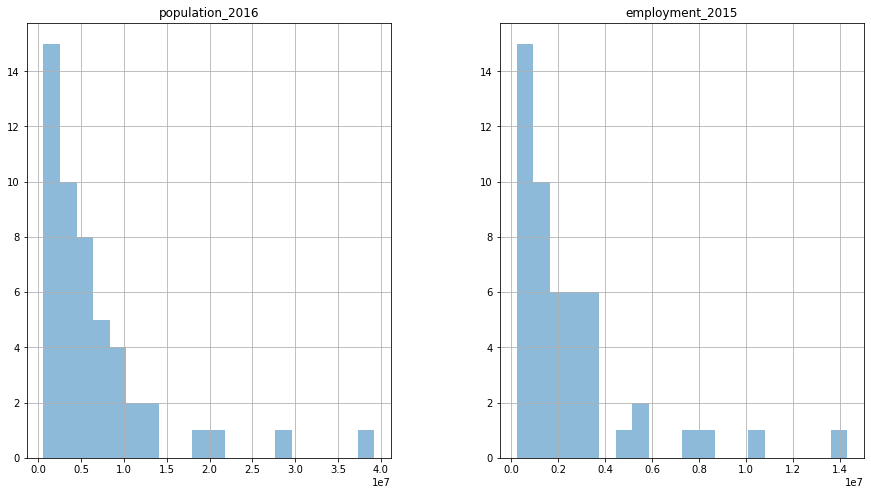

In [172]:
# Checking the distribution of population and employment data on two histogram plots
df_censusII.hist(figsize=(15,8), bins= 20, alpha= 0.5);

The polulation histogram is right-skewed, means number of states with large population estimates are low in numbers. Most of the states had population between 1,000,000 and 14,000,000 in 2016. The employment histogram is also right-skewed and simply proportionate to the population histogram, although the data were from 2015 and 2016, respectively. This means, the total employment estimates were proportionate to the number of total populations in 2015. Here, 1e7 is standard scientific notion that indicates an overall scale factor for the x-axis. That is, if there's a 2 on the x-axis and a 1e7 at the top, the value at 2 actually indicates 2*1e7 = 2 * 10^7 = 20,000,000.

<a id='eda'></a>
## Exploratory Data Analysis

As both of the datasets looks ready, the study moves on to the exploratory data analysis. In this section, statistics are computed by looking at relationships between the variables and visualizations are created to address the research questions in a systematic apporach. 

### Research Question 1: Are the gun registration numbers growing over the years?

First, year-data is extracted from the month column in df_gun by converting month to datetime.

In [173]:
# Converting month column to datetime
import datetime as dt 
df_gun['date'] = pd.to_datetime(df_gun.month, format="%Y-%m")
# Separate into month and year
df_gun['year'] = df_gun['date'].dt.year
df_gun.head()

,month,state,total_permit,date,year
0,2017-09,Alabama,32019,2017-09-01,2017
1,2017-09,Alaska,6303,2017-09-01,2017
2,2017-09,Arizona,28394,2017-09-01,2017
3,2017-09,Arkansas,17747,2017-09-01,2017
4,2017-09,California,123506,2017-09-01,2017


The dataframe is now displaying permit data by years. 
Next, the mean of total permits are computed. The new dataframe, df_gunII, contains permit data in a decending order, and only the top 10 statistics are displayed.

In [174]:
# Computing the mean of total permits 
df_gunII = df_gun.groupby('year')['total_permit'].mean().sort_values(ascending=False).head(10)
df_gunII

year
2016    41553.806061
2017    36344.501010
2015    34888.315152
2013    31767.733333
2014    31606.425758
2012    29490.654545
2011    24752.624242
2010    21697.710606
2009    21189.322727
2008    19231.795455
Name: total_permit, dtype: float64

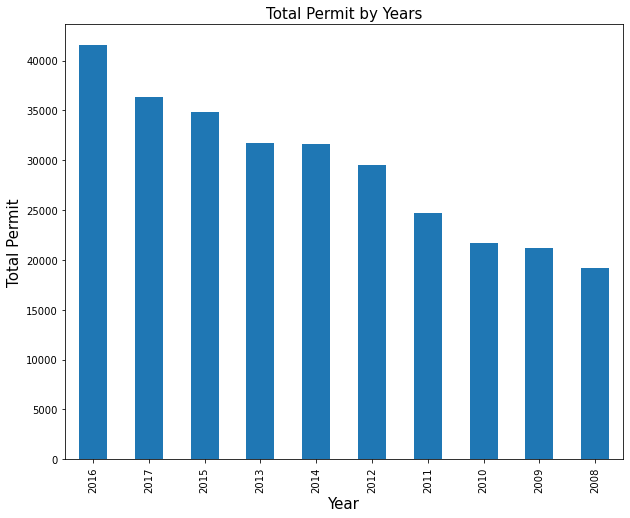

In [175]:
# Visualizing the results in a bar chart 
df_gunII.plot(kind='bar', figsize=(10,8));
plt.title("Total Permit by Years", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Permit", fontsize=15);

The graph shows a growing trend in gun registrations from 2008 to 2016. This means, in 2016, the highest number of firearm permits had been processed by NICS. Interesting to note, the number of permits in 2017 falls behind that of 2016, which does not follow the trend. However, it can justified because the original gun-data file does not provide the data for a full year in 2017. Data is given from January to September only, for 2017.  

### Research Question 2: Which state had the highest gun registration in 2016?

To answer this question, first, only 2016 permit data is extracted in a dataframe. Then, the average of total permits is calculated to identify which state processed the highest gun permits in that year.

In [176]:
# Creating a dataframe only for year 2016
df_gun2016 = df_gun[df_gun['date'].dt.year == 2016]
df_gun2016

,month,state,total_permit,date,year
495,2016-12,Alabama,62014,2016-12-01,2016
496,2016-12,Alaska,8786,2016-12-01,2016
497,2016-12,Arizona,44887,2016-12-01,2016
498,2016-12,Arkansas,29926,2016-12-01,2016
499,2016-12,California,298161,2016-12-01,2016
...,...,...,...,...,...
1150,2016-01,Virginia,44181,2016-01-01,2016
1151,2016-01,Washington,58050,2016-01-01,2016
1152,2016-01,West Virginia,18985,2016-01-01,2016
1153,2016-01,Wisconsin,39561,2016-01-01,2016


In [177]:
# Computing mean of total permits in a new dataframe
# Displaying the top ten results in a decending order 
df_gun_top2016 = df_gun2016.groupby('state')['total_permit'].mean().sort_values(ascending=False).head(10)
df_gun_top2016

state
Kentucky        306403.916667
California      198097.250000
Illinois        160339.166667
Texas           143477.166667
Indiana         119727.083333
Florida         119611.666667
Pennsylvania     95268.333333
Ohio             72977.000000
Tennessee        59564.500000
Washington       59499.666667
Name: total_permit, dtype: float64

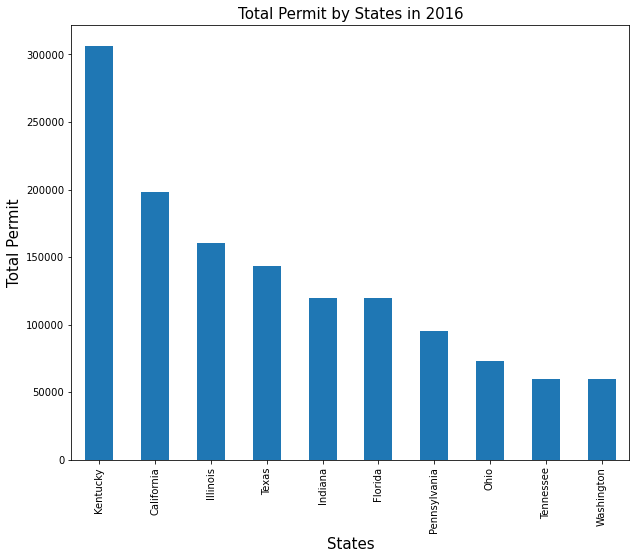

In [178]:
# Plotting the results in a bar chart 
df_gun_top2016.plot(kind='bar', figsize=(10,8));
plt.title("Total Permit by States in 2016", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Permit", fontsize=15);

The above graph shows that Kentucky had the highest number of gun permits inititated by NICS in 2016. And, the mean of total permits is significantly higher compared to the other states. For instance, Kentucky gun permits are found 35% (approx) higher than California, which appears second in the list. 
Now a question aries, is the Kentucky data an outlier in the dataset? To clarify this doubt, Kentucky data is compared for three consequitive years—2016, 2015, and 2014 in the following steps.

In [179]:
# Creating a new dataframe with data for 2016, 2015, and 2014
df_gunIII = df_gun[df_gun['year'].isin([2016,2015,2014])]
df_gunIII

,month,state,total_permit,date,year
495,2016-12,Alabama,62014,2016-12-01,2016
496,2016-12,Alaska,8786,2016-12-01,2016
497,2016-12,Arizona,44887,2016-12-01,2016
498,2016-12,Arkansas,29926,2016-12-01,2016
499,2016-12,California,298161,2016-12-01,2016
...,...,...,...,...,...
2470,2014-01,Virginia,31647,2014-01-01,2014
2471,2014-01,Washington,40612,2014-01-01,2014
2472,2014-01,West Virginia,15350,2014-01-01,2014
2473,2014-01,Wisconsin,23568,2014-01-01,2014


In [180]:
# Figuring out the top 10 states with higher average gun permits
df_gun_top = df_gunIII.groupby(['year','state']).total_permit.mean().sort_values(ascending=False).head(10)
df_gun_top

year  state     
2016  Kentucky      306403.916667
2015  Kentucky      268197.583333
2014  Kentucky      207682.000000
2016  California    198097.250000
      Illinois      160339.166667
2015  California    146756.583333
2016  Texas         143477.166667
2015  Texas         131188.833333
2014  California    122884.666667
      Texas         122166.000000
Name: total_permit, dtype: float64

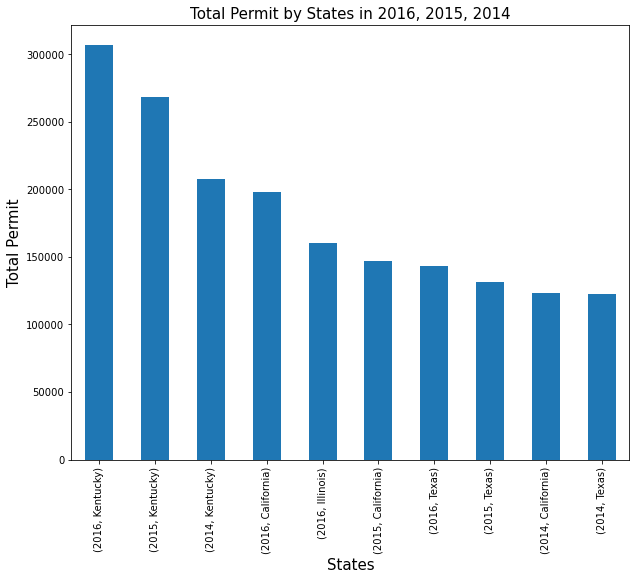

In [181]:
# Displaying the results in a bar chart 
df_gun_top.plot(kind='bar', figsize=(10,8));
plt.title("Total Permit by States in 2016, 2015, 2014", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Permit", fontsize=15);

The bar chart shows that Kentucky had the highest gun registrations in the three consequitive years. It can be commented that, Kentucky gun permit statistics in the df_gun_top2016 dataframe was not an outlier. 

### Reseach Question 3: Which census data was most associated to Kentucky's gun registration?

There must be some factors which influenced Kentucky to process so many gun permits each year. To find the answer, investigation is now performed on the population estimates data and employment data from the df_censusII dataframe to determine if they have any association to Kentucky's high gun processing.
The original census-data file contains population estimates on July 01, 2016. Therefore, permit data is also extracted to have the statistics on that specific date of the year. The new dataframe if formed with 50 gun permit entries filed on July 01, 2016 in 50 states.

In [182]:
# Creating a dataframe with July 01, 2016 data only 
df_gunIV = df_gun[(df_gun['date'] == '2016-07-01')]
df_gunIV.head()

,month,state,total_permit,date,year
770,2016-07,Alabama,48927,2016-07-01,2016
771,2016-07,Alaska,6793,2016-07-01,2016
772,2016-07,Arizona,34496,2016-07-01,2016
773,2016-07,Arkansas,19378,2016-07-01,2016
774,2016-07,California,190218,2016-07-01,2016


The dataframe below displays the top ten states in accordance with their gun permit totals on July 01, 2016.

In [183]:
# Sorting the data in a decending order 
df_gunV = df_gunIV.sort_values('total_permit', ascending=False).head(10)
df_gunV

,month,state,total_permit,date,year
788,2016-07,Kentucky,363085,2016-07-01,2016
774,2016-07,California,190218,2016-07-01,2016
784,2016-07,Illinois,168227,2016-07-01,2016
816,2016-07,Texas,127207,2016-07-01,2016
779,2016-07,Florida,125208,2016-07-01,2016
785,2016-07,Indiana,88340,2016-07-01,2016
810,2016-07,Pennsylvania,86137,2016-07-01,2016
807,2016-07,Ohio,63148,2016-07-01,2016
815,2016-07,Tennessee,57653,2016-07-01,2016
780,2016-07,Georgia,49183,2016-07-01,2016


Now, the impact of population will be examined on the total permit data. Therefore, the dataframes of gun-data and census-data will be merged. The combined dataframe will only display the statistics of the top 10 states in gun permit totals.

In [184]:
# Merging two dataframes to examine the impact of population
df_new = pd.merge(df_gunV, df_censusII[['state', 'population_2016']], on='state', how='left')
df_new

,month,state,total_permit,date,year,population_2016
0,2016-07,Kentucky,363085,2016-07-01,2016,4436974.0
1,2016-07,California,190218,2016-07-01,2016,39250017.0
2,2016-07,Illinois,168227,2016-07-01,2016,12801539.0
3,2016-07,Texas,127207,2016-07-01,2016,27862596.0
4,2016-07,Florida,125208,2016-07-01,2016,20612439.0
5,2016-07,Indiana,88340,2016-07-01,2016,6633053.0
6,2016-07,Pennsylvania,86137,2016-07-01,2016,12784227.0
7,2016-07,Ohio,63148,2016-07-01,2016,11614373.0
8,2016-07,Tennessee,57653,2016-07-01,2016,6651194.0
9,2016-07,Georgia,49183,2016-07-01,2016,10310371.0


Month, year, and date columns are dropped from df_new as they convey the same data. Only three relevant columns are preserved.

In [185]:
# Dropping month, year, and date columns
df_new.drop(['month', 'year', 'date'], axis=1, inplace=True)
df_new.head()

,state,total_permit,population_2016
0,Kentucky,363085,4436974.0
1,California,190218,39250017.0
2,Illinois,168227,12801539.0
3,Texas,127207,27862596.0
4,Florida,125208,20612439.0


The population columns is sorted in a decending order and then, the dataframe is reordered. It will make the visualization and comparison more comprehensive and readable. 

In [186]:
# Sorting the population column in a decending order 
df_population = df_new.sort_values('population_2016', ascending=False)
df_population

,state,total_permit,population_2016
1,California,190218,39250017.0
3,Texas,127207,27862596.0
4,Florida,125208,20612439.0
2,Illinois,168227,12801539.0
6,Pennsylvania,86137,12784227.0
7,Ohio,63148,11614373.0
9,Georgia,49183,10310371.0
8,Tennessee,57653,6651194.0
5,Indiana,88340,6633053.0
0,Kentucky,363085,4436974.0


In [187]:
# Reordering the columns 
df_population = df_population[["state", "population_2016", "total_permit"]]

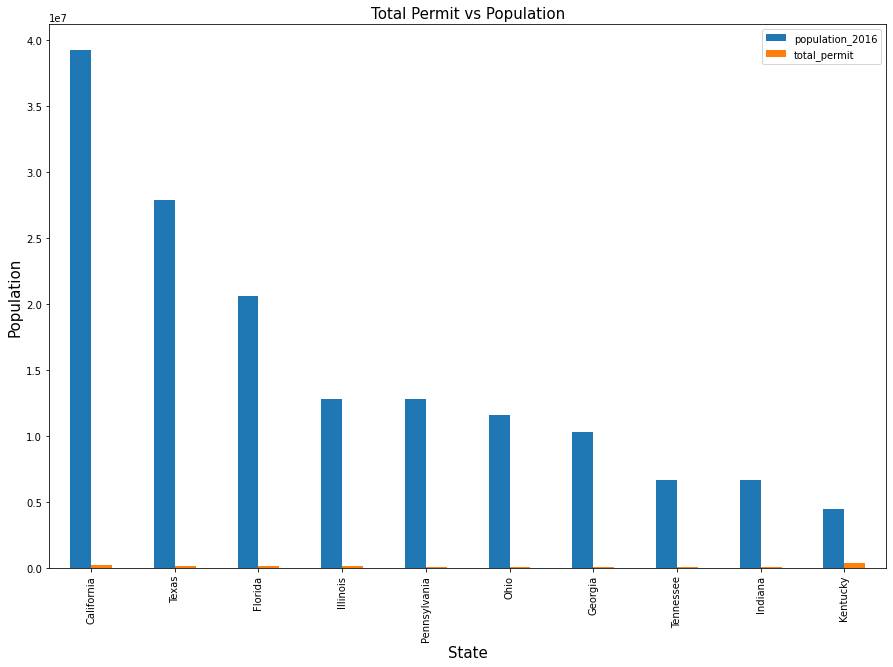

In [188]:
# Creating a side by side bar graph to interpret the results 
df_population.set_index('state').plot(kind='bar', figsize=(15,10));
plt.title("Total Permit vs Population", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.ylabel("Population", fontsize=15);

The above plot displays that there is no correlation between the total population and gun permits of Kentucky. In 2016, Kentucky apprears as the lowest in population, but the highest in total gun processing numbers. By conducting some literature review, it can be commented that the relaxed gun laws in Kentucky might be a cause of its higher gun permit rate [2].

In the next few steps, the impact of employment will be examined on Kentucky's gun permit totals in 2015. First, permit data is extracted for 2015 and the sum of total permits are calculated displaying the top states. Afterward, employment estimates in 2015 is combined to that gun dataset.

In [189]:
# Extracting gun data for 2015 
df_gun2015 = df_gun[(df_gun['year'] == 2015)]
df_gun2015.head()

,month,state,total_permit,date,year
1155,2015-12,Alabama,120914,2015-12-01,2015
1156,2015-12,Alaska,11055,2015-12-01,2015
1157,2015-12,Arizona,47759,2015-12-01,2015
1158,2015-12,Arkansas,36886,2015-12-01,2015
1159,2015-12,California,252946,2015-12-01,2015


In [190]:
# Determining the top ten states for 2015 in terms of total permits
df_gun_top2015 = df_gun2015.groupby('state')['total_permit'].sum().sort_values(ascending=False).head(10)
df_gun_top2015

state
Kentucky        3218371
California      1761079
Texas           1574266
Illinois        1247398
Florida         1147082
Indiana         1076917
Pennsylvania     993429
Ohio             748502
Alabama          737509
Tennessee        654192
Name: total_permit, dtype: int64

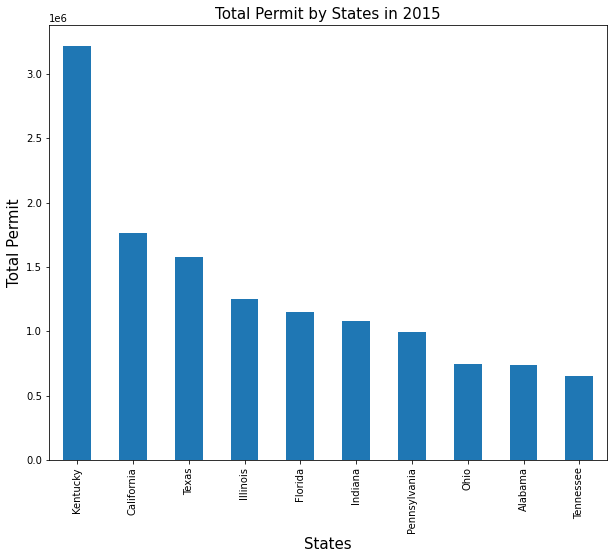

In [191]:
# Plotting the results in a bar chart 
df_gun_top2015.plot(kind='bar', figsize=(10,8));
plt.title("Total Permit by States in 2015", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Permit", fontsize=15);

The bar chart clearly shows that Kentucky was top in the total gun permit numbers in 2015 among the other states. According to the chart, Kentucky processed 3,500,000 count of firearm permits which was 50%(approx.) higher than California, the second highest state in the list. 

In [192]:
# Merging two datasets 
df_employment = pd.merge(df_gun_top2015, df_censusII[['state', 'employment_2015']], on='state', how='left')
df_employment

,state,total_permit,employment_2015
0,Kentucky,3218371,1579477.0
1,California,1761079,14325377.0
2,Texas,1574266,10239710.0
3,Illinois,1247398,5427549.0
4,Florida,1147082,7777990.0
5,Indiana,1076917,2660503.0
6,Pennsylvania,993429,5306896.0
7,Ohio,748502,4719985.0
8,Alabama,737509,1634391.0
9,Tennessee,654192,2507205.0


In [193]:
# Sorting the employment statistics in a decending order 
df_employment = df_employment.sort_values('employment_2015', ascending=False)
df_employment

,state,total_permit,employment_2015
1,California,1761079,14325377.0
2,Texas,1574266,10239710.0
4,Florida,1147082,7777990.0
3,Illinois,1247398,5427549.0
6,Pennsylvania,993429,5306896.0
7,Ohio,748502,4719985.0
5,Indiana,1076917,2660503.0
9,Tennessee,654192,2507205.0
8,Alabama,737509,1634391.0
0,Kentucky,3218371,1579477.0


In [194]:
# Reordering the columns in order they appear in the bar chart 
df_employment = df_employment[["state", "employment_2015", "total_permit"]]

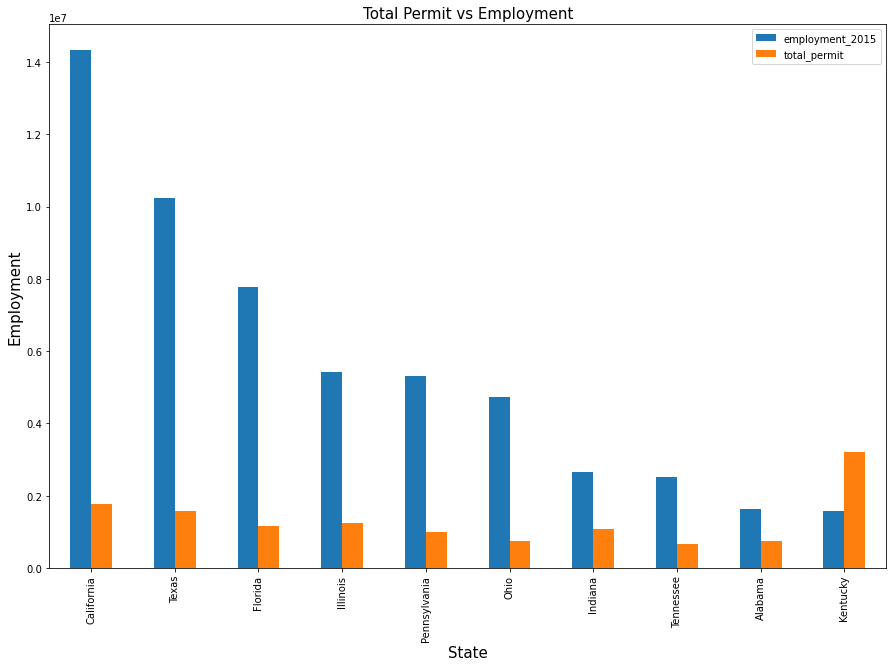

In [195]:
# Plotting the results in a side by side bar chart 
df_employment.set_index('state').plot(kind='bar', figsize=(15,10));
plt.title("Total Permit vs Employment", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.ylabel("Employment", fontsize=15);

The total permit vs employment chart clearly indicates that employment played some role in Kentucky's gun permits in 2015. The total employment of Kentucky is found the lowest among the ten states, while the total gun permit is the highest. There might be a synergie between the rate of unemployment and the number of crime in a state. Therfore, it can be interpreted that employment had a significant influence on the large number of firearm registrations in Kentucky.

<a id='conclusions'></a>
## Conclusions

After a thorough research, the report reaches to some tentative conclusions. 
1. The firearm registration and permit processing are increasing over the years in the USA. Although all the firearms are not purchased to violate laws and orders, higher gun permits can be an indicator of higher crime rates in the states. Further research should be conducted to investigate this correlation, which is currently out of the scope of this study.
2. This study identified the top 10 states where the firearm permit processing were the highest. Particulary, the number of total permits appeared to be 35% to 50% higher in Kentucy, leading the list. 
3. The census data of population and employment are examined to determine their association with the high gun permit numbers in the states. The population statistics does not seem to be correlated to the permit data. However, the total employment might have some influence on the crime rate as well as higher firearm purchasing permits in Kentucky. Again, the remarks are tentative, because, Kentucky follows some relaxed gun laws in the state compared to the other counterparts. 

To be noted, the research materials and data files have some limitations. There are not much literature and resources available to justify the conclusions and findings of this report. This project is carried out in a given deadline, exploring only the provided data files. 

<a id='conclusions'></a>
## References

[1] file:///C:/Users/tonim/Documents/Data%20Analyst/Project%202/NICS_Firearm_Checks_-_Year_by_State_Type.pdf

[2] https://giffords.org/lawcenter/gun-laws/states/kentucky/